Load the data.

In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_51887ca7abe94a85a6e5a1af83c9864c.xlsx"
df=pd.read_excel(url)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
df=df.drop(["No"],axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


Data exploration.

In [3]:
df.shape

(414, 7)

In [4]:
df.dtypes

X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [5]:
df.isna().any()

X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

"X1 transaction date " is a not very common format: fraction of the year. The decimals behind the year are not months or days, but rather fraction of the year. Real estate price is seasonabl. Based on these two reasons, I am going to egineer a new feature, month, to account for the seasonality of real estate price.

In [6]:
date=df[["X1 transaction date"]].astype(float)
date.head()

,X1 transaction date
0,2012.916667
1,2012.916667
2,2013.583333
3,2013.500000
4,2012.833333


In [7]:
month=((date-date.astype(int))*365/30).astype(int).rename(columns={"X1 transaction date":"month"})
month

,month
0,11
1,11
2,7
3,6
4,10
...,...
409,0
410,8
411,3
412,0


In [8]:
df=df.drop(["X1 transaction date"],axis=1)
df=pd.concat([month,df],axis=1)
df.head()

,month,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,11,32.0,84.87882,10,24.98298,121.54024,37.9
1,11,19.5,306.59470,9,24.98034,121.53951,42.2
2,7,13.3,561.98450,5,24.98746,121.54391,47.3
3,6,13.3,561.98450,5,24.98746,121.54391,54.8
4,10,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
age=df[["X2 house age"]]
distance=df[["X3 distance to the nearest MRT station"]]
stores=df[["X4 number of convenience stores"]]

In [10]:
y=df[["Y house price of unit area"]]

Check whether any of the predictor variables needs to be transformed. Histogram is a very good way to find out whether the distribution of a variable is smooth or skewed. If the distribution of a variable is skewed, transforming that variable might improve model performance.

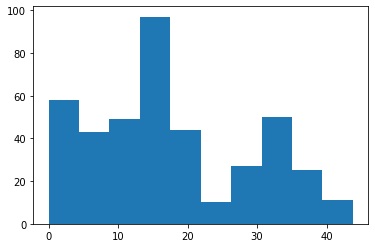

In [392]:
import matplotlib.pyplot as plt
plt.hist(age)
plt.show()

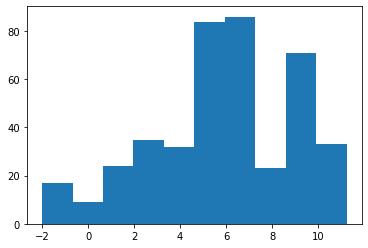

In [393]:
import numpy as np
plt.hist(2*(np.sqrt(age)-1))
plt.show()

Transformation does not smooth out the distribution of "age". So, I will not transform it.

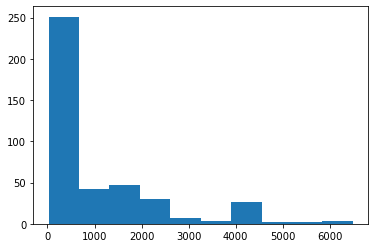

In [394]:
plt.hist(distance)
plt.show()

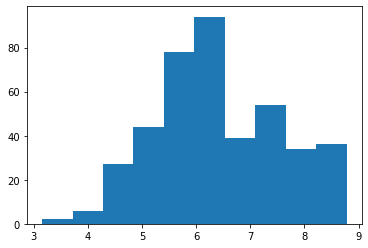

In [395]:
plt.hist(np.log(distance))
plt.show()

Transformation by natural logarithm clearly evens out the distribution of "distance".

In [12]:
import numpy as np
distance=np.log(distance)
distance.head()

,X3 distance to the nearest MRT station
0,4.441225
1,5.725527
2,6.331474
3,6.331474
4,5.967603


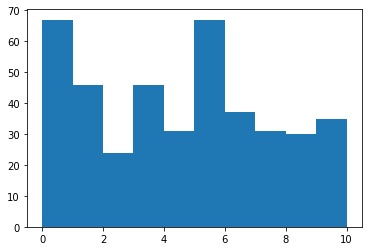

In [15]:
import matplotlib.pyplot as plt
plt.hist(stores)
plt.show()

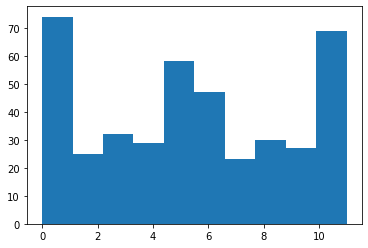

In [16]:
plt.hist(month)
plt.show()

In [17]:
latitude=df[["X5 latitude"]]
longitude=df[["X6 longitude"]]
X=pd.concat([month,age,distance,stores,latitude,longitude],axis=1)
X.head()

,month,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,11,32.0,4.441225,10,24.98298,121.54024
1,11,19.5,5.725527,9,24.98034,121.53951
2,7,13.3,6.331474,5,24.98746,121.54391
3,6,13.3,6.331474,5,24.98746,121.54391
4,10,5.0,5.967603,5,24.97937,121.54245


In [18]:
y=np.log(y)
y.head()

,Y house price of unit area
0,3.634951
1,3.742420
2,3.856510
3,4.003690
4,3.763523


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape)
print(X_test.shape)

(351, 6)
(63, 6)


In [20]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(alpha=0.5,loss='ls',learning_rate=0.001,n_estimators=4200,max_features='sqrt',criterion="mse",max_depth=7,min_samples_split=2,validation_fraction=0.1,subsample=0.15,random_state=0).fit(X_train,y_train)
model

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.5, criterion='mse', init=None,
             learning_rate=0.001, loss='ls', max_depth=7,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=4200,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.15, tol=0.0001, validation_fraction=0.1,
             verbose=0, warm_start=False)

In [21]:
from sklearn.metrics import r2_score
yhat1=model.predict(X_train)
print("R-squared on train data is: ",r2_score(y_train,yhat1))

R-squared on train data is:  0.9044072292066722


In [22]:
yhat2=model.predict(X_test)
print("R-squared on test data is: ",r2_score(y_test,yhat2))

R-squared on test data is:  0.8818998808421027


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse
print("Root mean squared error on train data is: ",np.sqrt(mse(y_train,yhat1)))

Root mean squared error on train data is:  0.12016312718833698


In [24]:
print("Root mean squared error on test data is: ",np.sqrt(mse(y_test,yhat2)))

Root mean squared error on test data is:  0.1405759816575111


Comparison of actual price vs predicted price on test data.

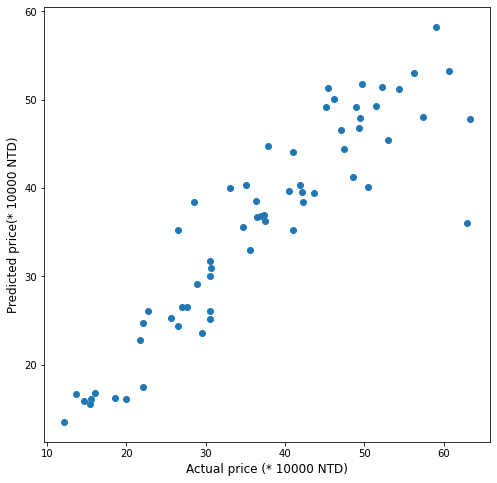

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(np.exp(y_test),np.exp(yhat2))
plt.xlabel("Actual price (* 10000 NTD)",fontsize=12)
plt.ylabel("Predicted price(* 10000 NTD)",fontsize=12)
plt.show()